### Class 1

Solutions

In [1]:
#!pip install jupyter_contrib_nbextensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Explore the Titanic Data

In [2]:
titanic = sns.load_dataset('titanic')
#titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Contingency Tables as simple models

In [3]:
titanicSmall = titanic[['pclass','sex', 'survived']]
SurvByClassSex = titanicSmall.groupby(['pclass','sex'])
SurvProb = SurvByClassSex.mean()
SurvProb

survived
pclass sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [97]:
SurvByClassSex.size()

pclass  sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [ ]:
(0.968*94  + (1-0.3688)*122)/ 891

### Task 1

We can regard this simple counting exercise as a "predictive model" where we "predict" the outcome based on bucketing the data and "classify" the Survival status by $S=1$, if $P_S(sex,pclass) \geq 0.5$ and $0$ otherwise.

1. Compute the **confusion matrix**, which is simply a $2x2$ contingency table of the predicted versus the actual outcomes. (Hint: Look at `pd.crosstab()`)
2. (**MC**) Compute the overall accuracy of this model in two ways: (i) directly from the confusion matrix and (ii) from the survival probabilities. (Hint: Look at `SurvByClassSex.size()`) 
3. Higher accuracy(="classification rate") clearly is equivalent to a lower "misclassification rate", which in machine learning is also called a *loss function*. Discuss 
    * whether misclassifying a female P1 passenger should count equally towards (reducing) the quality of the model as misclassifying a male P1 passenger.
    * whether there could be another loss function which would be more discriminatory.
    * what you would consider equally spaced "losses"
        * $0.3, 0.2, 0.1, 0$
        * $0.1, 0.01, 0.001, ...$

In [11]:
#1. Compute the **confusion matrix
titanicSmall['surv_pred'] = titanic['sex'] == "female"
ConfMat = pd.crosstab(titanicSmall['surv_pred'], titanicSmall['survived'])
ConfMat

C:\Users\loecherm\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


survived,0,1
surv_pred,,
False,468,109
True,81,233


In [35]:
#overall accuracy of this model 
N=np.sum(ConfMat.values)
acc1 = np.round((ConfMat.values[0,0]+ConfMat.values[1,1])/N,3)
#np.dot(SurvProb.values, )
p = SurvProb.values
p[p<0.5]=1-p[p<0.5]

acc2 = np.round(SurvByClassSex.size().values.dot(p)/N,3)
print(acc1, acc2)

0.787 [0.787]


### Task 2

We have seen a strong dependence of the *outcome* on the two "variables"/"features"/"regressors" *pclass* and *sex*.
The natural question is whether there could be more factors "correlated with"/"influencing"/"affecting" Survival.


1. Does the port of embarkment matter ?
    * (**MC**) What is the distribution (counts) of embarkment? (Hint: look at `np.unique` )
    * (**MC**) What are the survival rates for *Southampton* as a function of `pclass`?
    * Do the survival rates "look" different from *Cherbourg* ?
    * How would you make sure that the observed differences are not due to chance ?
    
2. Does the *fare* paid matter ?
    * How would you quantify/visualize this ? 
    * What is the fundamental difference between the previous relationship of two variables ?
    * Have you heard of the terms *confounding* or *confounders* or *marginal dependence* versus *conditional dependence* ? 
    * Discuss dependencies among the features. Revisit the port of embarkment question in this light !
3. Does *age* matter ?
    * (**MC**) What is the survival rate for passengers below the age of 18?
    * (**MC**) What are the survival rates for passengers below the age of 18 stratified by pclass?
    * How would you make sure that the observed differences are not due to chance ?
    


In [104]:
#1. Does the port of embarkment matter ?
#    What is the distribution (counts) of embarkment? 
titanic.groupby('embarked').size()

embarked
C    168
Q     77
S    644
dtype: int64

In [107]:
titanic.groupby(['embarked','pclass']).size()

embarked  pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

In [106]:
#     What are the survival rates for Southampton as a function of pclass?
#titanicS = titanic[titanic['embarked']=="S"]
titanic[['embarked','pclass', 'survived']].groupby(['embarked', 'pclass']).mean()
#np.round(titanicS[['embarked','pclass', 'survived']].groupby('pclass').mean().values,3)

survived
embarked pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802

In [59]:
#     What are the survival rates for Southampton as a function of pclass?
titanicC = titanic[titanic['embarked']=="C"]
titanicC[['embarked','pclass', 'survived']].groupby('pclass').mean()

,survived
pclass,
1,0.694118
2,0.529412
3,0.378788


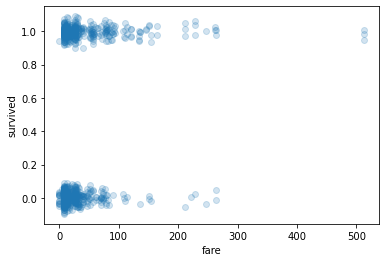

In [88]:
#2. Does the fare paid matter ?
#Approach 1: scatter plot with jitter and transparency alpha
titanic['surv_Jitter'] = titanic['survived'] +  np.random.normal(0,0.035,N)
plt.scatter('fare', 'surv_Jitter', data = titanic, alpha = 0.2)
plt.xlabel("fare")
plt.ylabel("survived")
plt.show()
#Appproach 3: coarse bins


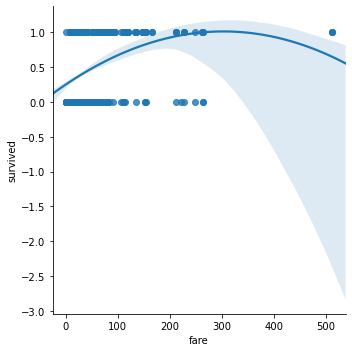

In [78]:
#Approach 1: scatter plot with smoothing line
#titanic2 = titanic[titanic['fare'] < 300,:]
sns.lmplot('fare', 'survived', data = titanic, order = 2)#, xlim)


,survived
Below18,
False,0.361183
True,0.539823


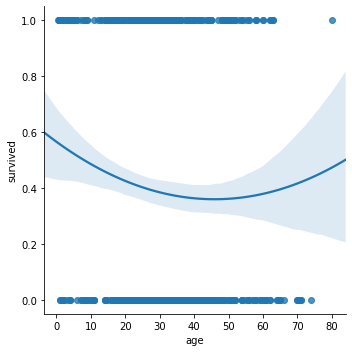

In [96]:
#3 Does age matter ?
sns.lmplot('age', 'survived', data = titanic, order = 2)#, xlim)
 #   (MC) What is the survival rate for passengers below the age of 18?
titanic['Below18'] = titanic['age'] < 18
titanic[['survived', 'Below18']].groupby('Below18').mean()